<a href="https://colab.research.google.com/github/emiliomercuri/hidrologia/blob/main/notebooks/2023_06-19_Modelagem_Hidrol%C3%B3gica_1_Observando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook para comparar dados

Bacia do Cambara


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy

In [ ]:
!gdown 1MtSMeHUXFfgDfmRZGW82ZxaHfoSxLbuZ

Downloading...
From: https://drive.google.com/uc?id=1MtSMeHUXFfgDfmRZGW82ZxaHfoSxLbuZ
To: /content/dados_cambara_2004-2008.csv
100% 80.2k/80.2k [00:00<00:00, 4.18MB/s]


In [ ]:
df_passado  = pd.read_csv('dados_cambara_2004-2008.csv', index_col= 0, sep =',')
df_passado.index=pd.to_datetime(df_passado.index)
df_passado

,prec(mm/dia),etp(mm/dia),q(m3/s),et(mm/dia)
data,,,,
2004-01-01,0.0000,3.954348,0.76,2.996060
2004-01-02,0.0000,3.954348,0.54,2.996060
2004-01-03,0.0000,3.954348,0.51,2.996060
2004-01-04,0.0000,3.954348,0.48,2.996060
2004-01-05,0.0000,3.954348,0.61,2.996060
...,...,...,...,...
2008-12-27,0.0000,8.172464,0.61,6.019203
2008-12-28,0.0000,8.172464,0.64,6.019203
2008-12-29,0.0000,8.172464,0.64,6.019203


In [ ]:
area = 13 # km2
# fator de conversao (m_3/s >> mm/dia)
f_conv = (1000 * 24 * 60 * 60)/(area * 1000000)

In [ ]:
df_passado['q(mm)'] = df_passado['q(m3/s)']*f_conv
df_passado

,prec(mm/dia),etp(mm/dia),q(m3/s),et(mm/dia),q(mm)
data,,,,,
2004-01-01,0.0000,3.954348,0.76,2.996060,5.051077
2004-01-02,0.0000,3.954348,0.54,2.996060,3.588923
2004-01-03,0.0000,3.954348,0.51,2.996060,3.389538
2004-01-04,0.0000,3.954348,0.48,2.996060,3.190154
2004-01-05,0.0000,3.954348,0.61,2.996060,4.054154
...,...,...,...,...,...
2008-12-27,0.0000,8.172464,0.61,6.019203,4.054154
2008-12-28,0.0000,8.172464,0.64,6.019203,4.253538
2008-12-29,0.0000,8.172464,0.64,6.019203,4.253538


#### Missing data

In [ ]:
print('Falhas no dataframe:')
print(df_passado.isnull().sum())
#print(df_futuro.isnull().sum())

Falhas no dataframe:
prec(mm/dia)     0
etp(mm/dia)      0
q(m3/s)         31
et(mm/dia)       0
q(mm)           31
dtype: int64


In [ ]:
df_passado = df_passado.interpolate(method='linear')

In [ ]:
print('Falhas no dataframe:')
print(df_passado.isnull().sum())
#print(df_futuro.isnull().sum())

Falhas no dataframe:
prec(mm/dia)    0
etp(mm/dia)     0
q(m3/s)         0
et(mm/dia)      0
q(mm)           0
dtype: int64


In [ ]:
df_passado_year = df_passado.resample('y').sum()
#df_futuro_year  = df_futuro.resample('y').sum()
df_passado_year['year'] = df_passado_year.index.year
#df_futuro_year['year'] = df_futuro_year.index.year

In [ ]:
x_passado = df_passado_year['year'].values
#x_futuro  = df_futuro_year['year'].values

In [ ]:
df_passado_year

,prec(mm/dia),etp(mm/dia),q(m3/s),et(mm/dia),q(mm),year
data,,,,,,
2004-12-31,2138.9158,1699.221739,243.89,1246.304348,1620.930462,2004
2005-12-31,1860.3497,1793.493478,271.76,1332.070652,1806.158769,2005
2006-12-31,1835.2915,1789.127174,299.20,1297.308696,1988.529231,2006
2007-12-31,1886.9272,1836.582609,250.44,1350.578261,1664.462769,2007
2008-12-31,2445.0256,1695.663043,400.92,1241.552174,2664.576000,2008


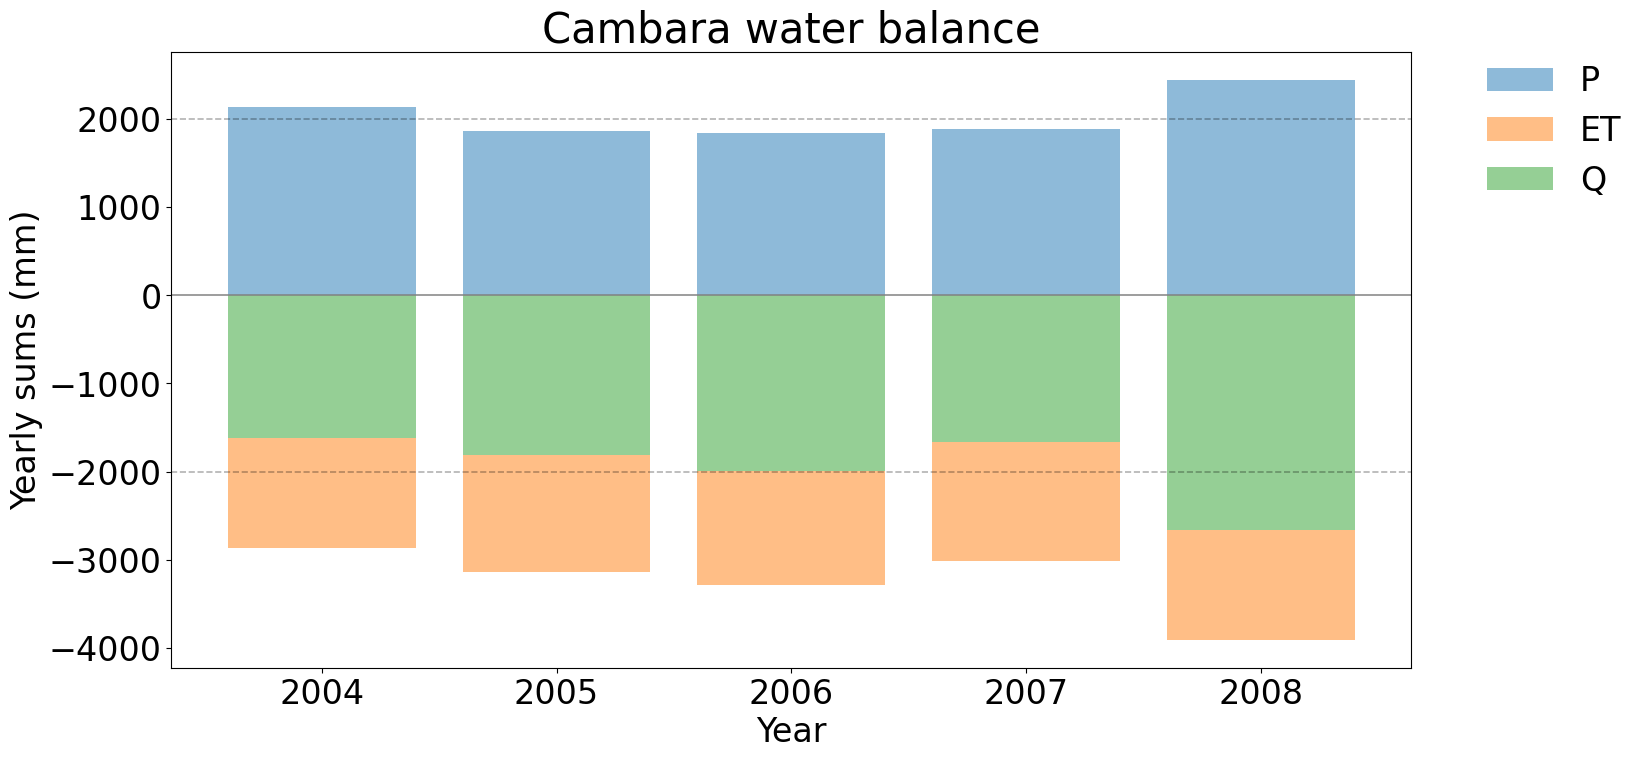

In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(x_passado, df_passado_year['prec(mm/dia)'], width=0.8, label='P',alpha=0.5)
plt.axhline(y = 0.0, color = 'gray', linestyle = '-',linewidth=1.2,alpha=0.9)
plt.bar(x_passado, df_passado_year['et(mm/dia)']*(-1), width=0.8, bottom = df_passado_year['q(mm)']*(-1), label='ET',alpha=0.5)
plt.bar(x_passado, df_passado_year['q(mm)']*(-1), width=0.8, label='Q',alpha=0.5)
#plt.plot(x, df_anual0['deltaS'], label='Delta S', marker='o' , color = 'black')
#plt.plot(df_anual0.index, df_anual0['sum_deltaS'], label='Sum Delta S', marker='o' , color = 'blue')

#plt.plot(x, f_linear(x), 'k--', label='Linear regression')

# specifying horizontal line type
plt.axhline(y = 2000.0, color = 'black', linestyle = '--',linewidth=1.2,alpha=0.3)
plt.axhline(y = -2000.0, color = 'black', linestyle = '--',linewidth=1.2,alpha=0.3)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0.,frameon=False, fontsize=24)
plt.xlabel('Year', fontsize=24) #x label
#plt.ylim([-3, 3])
plt.ylabel(r'Yearly sums (mm)', fontsize=24) #y label
plt.title(r'Cambara water balance', fontsize=30) #y label
plt.tick_params(axis='both', labelsize=24) #increase font size for ticks
plt.savefig('bar_plot_cambara_2004-2008_serie_anual.png', dpi = 300, bbox_inches='tight')
plt.show();

In [ ]:
# Acumula os dados
acumulado = df_passado.cumsum() #calculando o acumulado dos dados de cada coluna do dataframe

In [ ]:
entradas = acumulado['prec(mm/dia)']
saidas   = acumulado['et(mm/dia)'] + acumulado['q(mm)']

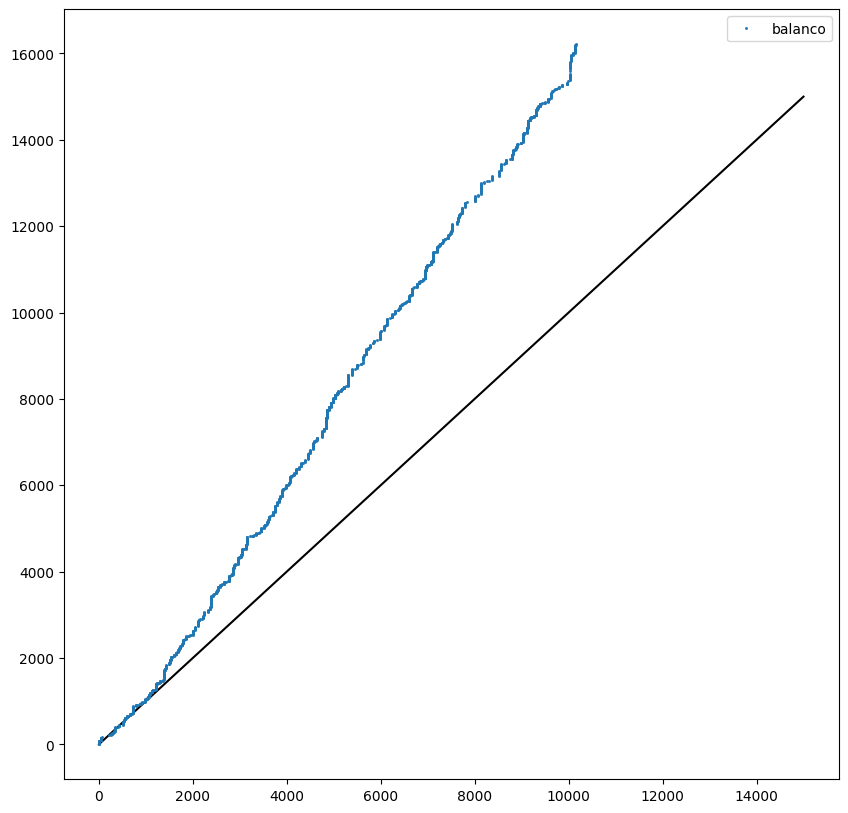

In [ ]:
###############################################################################
#####  Gráfico com correção
###############################################################################


plt.figure(figsize=(10,10))
z = numpy.array([0, 15000])
plt.plot(z,z,color='black')

plt.plot(entradas,saidas,'o',markersize = 2, markeredgewidth = 0.1, label='balanco')

leg = plt.legend(fontsize=10);

## Dados Mensais

In [ ]:
df_passado_month = df_passado.resample('m').sum()

In [ ]:
df_passado_month

,prec(mm/dia),etp(mm/dia),q(m3/s),et(mm/dia),q(mm)
data,,,,,
2004-01-31,306.6919,155.819701,22.01,116.951631,146.281846
2004-02-29,231.4092,213.594973,19.86,153.297283,131.992615
2004-03-31,185.3320,194.944565,17.16,142.255299,114.048000
2004-04-30,254.1393,142.966984,16.96,107.796875,112.718769
2004-05-31,146.7258,87.093342,16.81,66.072826,111.721846
2004-06-30,86.2280,87.817663,16.55,64.552446,109.993846
2004-07-31,169.8265,84.372962,18.68,63.547147,124.150154
2004-08-31,33.9562,112.002310,14.62,77.353125,97.166769
2004-09-30,110.4288,121.297283,21.12,85.245109,140.366769


In [ ]:
df_passado_month.to_csv('dados_cambara_mensais_2004-2008.csv')